# Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('Data_Train.xlsx')
df.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270


In [4]:
df.shape

(10683, 11)

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<AxesSubplot:>

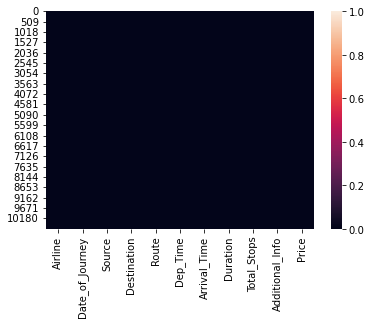

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are null values present in Route and Total_Stops, so we need to remove these null values from data.

In [9]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
# Dropping null values
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


Duplicates values are present, so we will remove it to make. data clean.

In [16]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
df.shape

(10462, 11)

Now, we will separate Day and Month from the Object type Date_of_Journey columns.

In [18]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [19]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now, we will separate Hour and Minute from the Object type Dep_Time columns.

In [24]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [25]:
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [27]:
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Now, we will separate Hour and Minute from the Object type Arrival_Time columns.

In [30]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

In [31]:
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [32]:
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


We will convert the total duration time in minutes.

In [34]:
df['Duration'] = df['Duration'].astype(str).str.replace("h", '*60').astype(str).str.replace(' ','+').astype(str).str.replace('m','*1').apply(eval)
df['Duration'] = df['Duration'].astype(str).str.replace("h", '*60').astype(str).str.replace(' ','+').astype(str).str.replace('m','*1').apply(eval)

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [36]:
df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

# Data Visualization

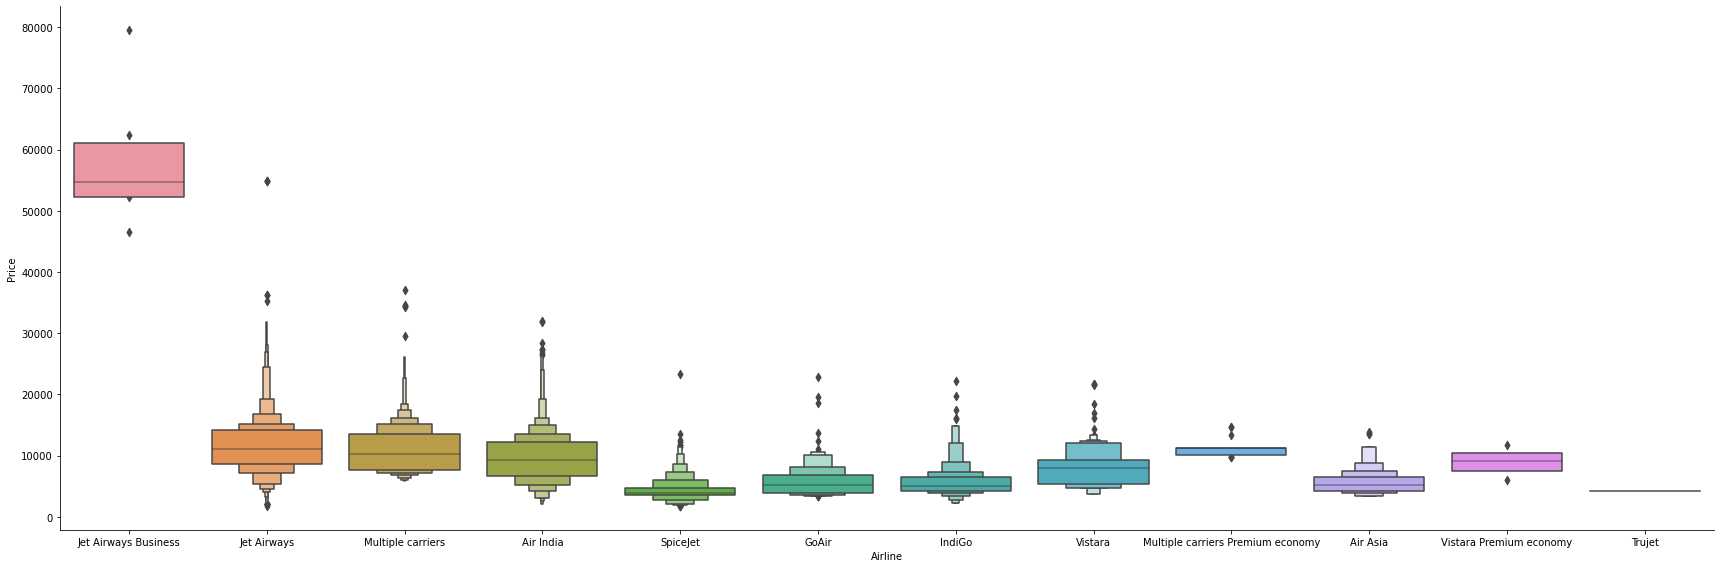

In [38]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

We have plotted cat plot between Airlines vs price. So, it comes out that Jet airways have highest prices and have most ouliers.
Price vs Source

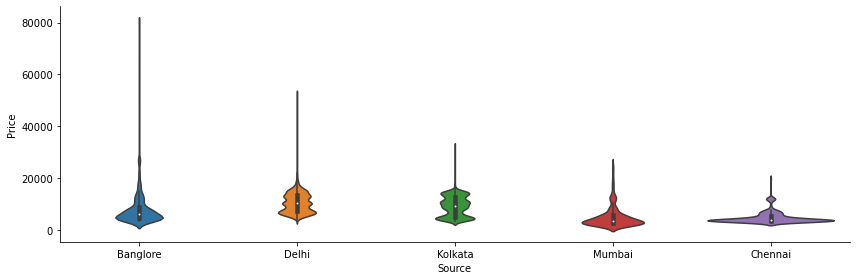

In [40]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Price vs Destination

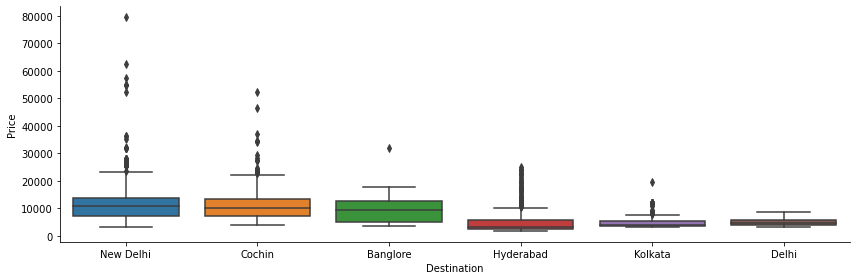

In [41]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Bar chart for Months (Duration) vs Number of Flights

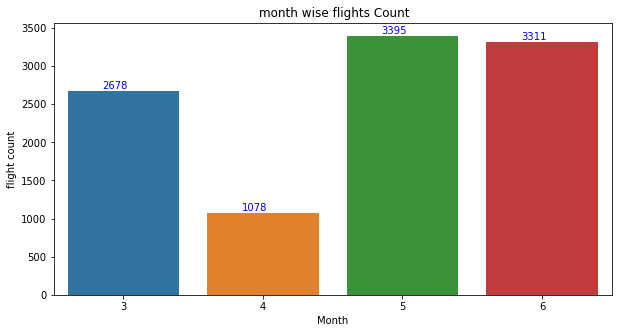

In [42]:
plt.figure(figsize = (10, 5))
plt.title(' month wise flights Count')
Bar_Graph=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('flight count')
for i in Bar_Graph.patches:
    Bar_Graph.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom', color= 'blue')

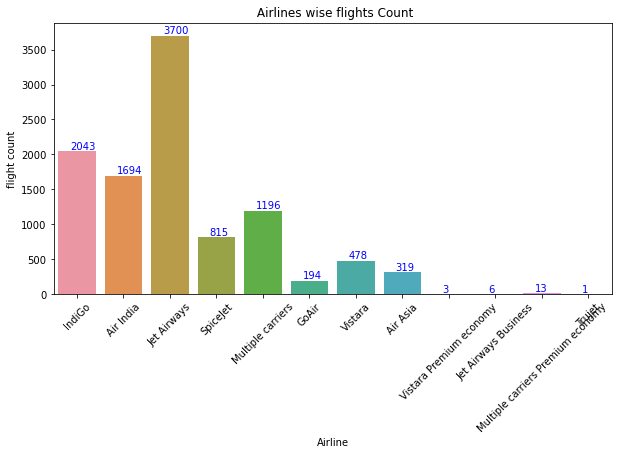

In [43]:
plt.figure(figsize = (10, 5))
plt.title(' Airlines wise flights Count')
Bar_Graph=sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('flight count')
plt.xticks(rotation = 45)
for i in Bar_Graph.patches:
    Bar_Graph.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom', color= 'blue')

Ticket Prices vs Airlines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

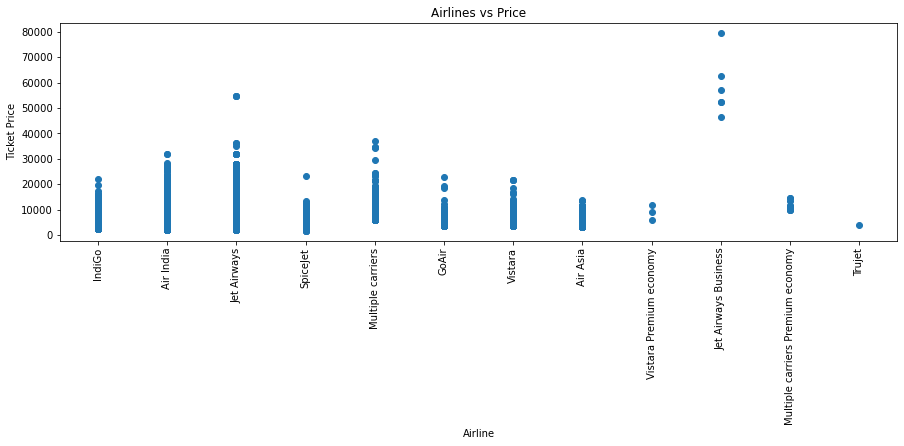

In [44]:
plt.figure(figsize = (15,4))
plt.title('Airlines vs Price')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Ticket Price')
plt.xticks(rotation = 90)

In [45]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,8,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,8,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,8,6218,12,5,18,5,23,30
4,3,0,5,29,285,0,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,4107,9,4,19,55,22,25
10679,1,3,0,64,155,4,8,4145,27,4,20,45,23,20
10680,4,0,2,18,180,4,8,7229,27,4,8,20,11,20
10681,10,0,5,18,160,4,8,12648,1,3,11,30,14,10


array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Route'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Additional_Info'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>,
        <AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>],
       [<AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

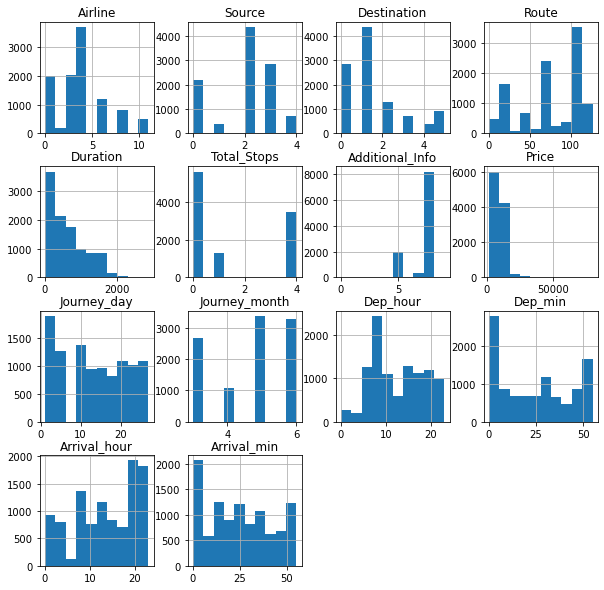

In [47]:
df.hist(figsize=(10,10))

In [48]:
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,1.953642,1.439495,74.286465,629.781591,1.463105,7.396483,9026.790289,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939
std,2.364627,1.186327,1.481015,36.707488,500.699045,1.821371,1.212030,4624.849541,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,170.000000,0.000000,8.000000,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,505.000000,0.000000,8.000000,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,910.000000,4.000000,8.000000,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,2860.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


There are values which are on diffrent scales. So, we will tune them to same scale by using scaling technique so the our machine learning models prediction will be of greater accuracy.

Count of No. of rows in every column are same, it means that there are no missing values in the data set. In columns Destination, Route, Duration, price, Journey Day mean is greater than median, it means skewness is present in the system.

In column Airline, Destination, Duration, Price etc there is large gap b/w max and 75th percentile,there are chances that some outliers may present.

High standard deviation in column Route, Duration, Price means data is spreaded.

Airline               AxesSubplot(0.125,0.657941;0.110714x0.222059)
Source             AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Destination        AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Route              AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Duration           AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total_Stops        AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Additional_Info       AxesSubplot(0.125,0.391471;0.110714x0.222059)
Price              AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Journey_day        AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Journey_month      AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Dep_hour           AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Dep_min            AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Arrival_hour             AxesSubplot(0.125,0.125;0.110714x0.222059)
Arrival_min           AxesSubplot(0.257857,0.125;0.110714x0.222059)
dtype: object

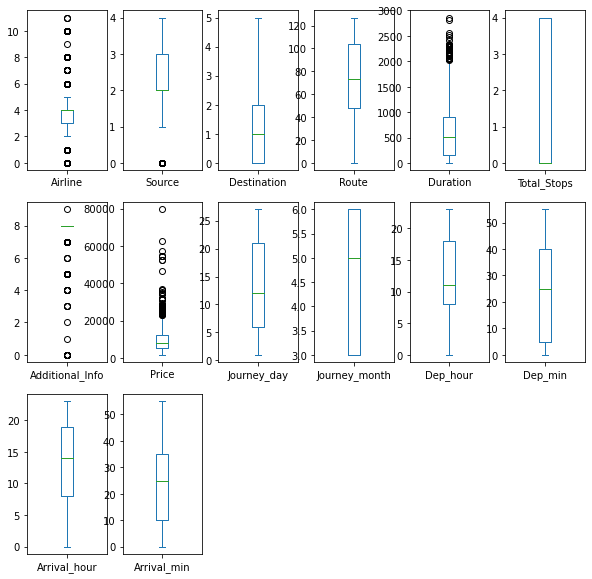

In [49]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

In [50]:
df.dtypes

Airline            int64
Source             int64
Destination        int64
Route              int64
Duration           int64
Total_Stops        int64
Additional_Info    int64
Price              int64
Journey_day        int64
Journey_month      int64
Dep_hour           int64
Dep_min            int64
Arrival_hour       int64
Arrival_min        int64
dtype: object

In [51]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.012172,0.015942,0.029636,-0.153618,0.034396,-0.058220,-0.036491,0.026482,0.026083,-0.032267,-0.062421,-0.005438,-0.073045
Source,-0.012172,1.000000,-0.589992,0.403884,0.162808,-0.222859,-0.021587,0.013796,0.005440,0.181072,0.060218,-0.056609,0.028257,0.021392
Destination,0.015942,-0.589992,1.000000,-0.457559,-0.254243,0.334097,0.024922,-0.065875,-0.040994,-0.362186,-0.074056,0.128523,-0.044605,0.016351
Route,0.029636,0.403884,-0.457559,1.000000,0.273200,-0.436066,0.042804,0.154374,0.079747,0.236674,-0.075188,-0.070978,0.021612,-0.174172
Duration,-0.153618,0.162808,-0.254243,0.273200,1.000000,-0.609794,-0.169939,0.501758,-0.029810,0.004874,-0.001285,-0.019225,0.061912,-0.070977
Total_Stops,0.034396,-0.222859,0.334097,-0.436066,-0.609794,1.000000,0.164639,-0.571991,0.030271,-0.021409,0.040310,0.049338,-0.099351,0.176743
Additional_Info,-0.058220,-0.021587,0.024922,0.042804,-0.169939,0.164639,1.000000,-0.068779,-0.016443,-0.049186,-0.059406,-0.015916,0.021293,0.044321
Price,-0.036491,0.013796,-0.065875,0.154374,0.501758,-0.571991,-0.068779,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163
Journey_day,0.026482,0.005440,-0.040994,0.079747,-0.029810,0.030271,-0.016443,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086
Journey_month,0.026083,0.181072,-0.362186,0.236674,0.004874,-0.021409,-0.049186,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261


<AxesSubplot:>

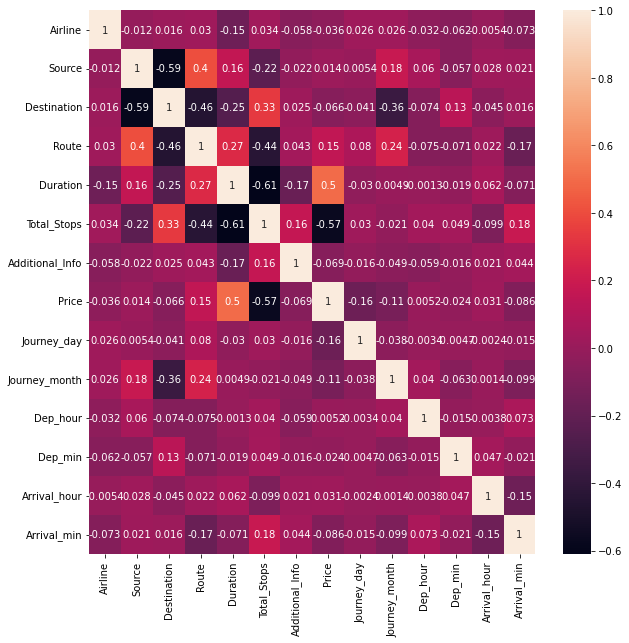

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 10})

In [53]:
first_column=df.pop('Price')

In [54]:
df.insert(13, 'Price', first_column)

In [55]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,18,170,4,8,24,3,22,20,1,10,3897
1,1,3,0,84,445,1,8,1,5,5,50,13,15,7662
2,4,2,1,118,1140,1,8,9,6,9,25,4,25,13882
3,3,3,0,91,325,0,8,12,5,18,5,23,30,6218
4,3,0,5,29,285,0,8,1,3,16,50,21,35,13302


In [56]:
x=df.iloc[:,0:-1]
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,24,3,22,20,1,10
1,1,3,0,84,445,1,8,1,5,5,50,13,15
2,4,2,1,118,1140,1,8,9,6,9,25,4,25
3,3,3,0,91,325,0,8,12,5,18,5,23,30
4,3,0,5,29,285,0,8,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,9,4,19,55,22,25
10679,1,3,0,64,155,4,8,27,4,20,45,23,20
10680,4,0,2,18,180,4,8,27,4,8,20,11,20
10681,10,0,5,18,160,4,8,1,3,11,30,14,10


In [57]:
y=df.iloc[:,-1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

# Removing Outliers using Zscore

In [58]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,0.414916,1.646877,2.404213,1.533452,0.918323,1.392916,0.497963,1.244442,1.462080,1.662578,0.234123,1.807045,0.888367,1.109233
1,1.260756,0.882057,0.972012,0.264633,0.369065,0.254274,0.497963,1.471958,0.256507,1.305841,1.360364,0.056554,0.586611,0.295113
2,0.008004,0.039079,0.296767,1.190918,1.019061,0.254274,0.497963,0.527123,1.115800,0.607390,0.031625,1.369422,0.016902,1.049859
3,0.414916,0.882057,0.972012,0.455339,0.608741,0.803337,0.497963,0.172810,0.256507,0.964126,1.031367,1.402189,0.318658,0.607355
4,0.414916,1.646877,2.404213,1.233771,0.688633,0.803337,0.497963,1.471958,1.462080,0.614900,1.360364,1.110440,0.620415,0.924444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.683676,0.882057,0.972012,0.280241,0.958269,1.392916,0.497963,0.527123,0.602787,1.138739,1.626112,1.256315,0.016902,1.063824
10679,1.260756,0.882057,0.972012,0.280241,0.948283,1.392916,0.497963,1.598755,0.602787,1.313352,1.094616,1.402189,0.284854,1.055607
10680,0.008004,1.646877,0.378478,1.533452,0.898350,1.392916,0.497963,1.598755,0.602787,0.782003,0.234123,0.348302,0.284854,0.388743
10681,2.545524,1.646877,2.404213,1.533452,0.938296,1.392916,0.497963,1.471958,1.462080,0.258164,0.297373,0.089320,0.888367,0.783027


In [59]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         784,   784,   825,   924,   935,   945,   958,   965,   968,
         974,  1042,  1065,  1111,  1194,  1244,  1339,  1344,  1420,
        1438,  1462,  1474,  1492,  1547,  1625,  1650,  1653,  1778,
        1784,  1797,  1909,  2044,  2068,  2087,  2096,  2160,  2393,
        2469,  2483,  2483,  2540,  2543,  2543,  2604,  2621,  2627,
        2640,  2677,  2701,  2904,  2904,  3010,  3010,  3088,  3088,
        3231,  3372,  3505,  3667,  3667,  3753,  3755,  3780,  3929,
        3974,  4008,  4078,  4418,  4476,  4476,  4606,  4627,  4779,
        4960,  4960,  5080,  5312,  5312,  5378,  5451,  5563,  5597,
        5636,  5636,  5645,  5646,  5654,  5673,  5680,  5717,  5789,
        5864,  5884,  5916,  5954,  5988,  6014,  6240,  6247,  6262,
        6332,  6399,  6497,  6497,  6509,  6526,  6902,  7096,  7138,
        7210,  7233,  7254,  7259,  7280,  7438,  7454,  7455,  7511,
        7516,  7609

In [60]:
df_new=df[(z<3).all(axis=1)]

In [61]:
df_new.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,18,170,4,8,24,3,22,20,1,10,3897
1,1,3,0,84,445,1,8,1,5,5,50,13,15,7662
2,4,2,1,118,1140,1,8,9,6,9,25,4,25,13882
3,3,3,0,91,325,0,8,12,5,18,5,23,30,6218
4,3,0,5,29,285,0,8,1,3,16,50,21,35,13302


In [62]:
df=df_new

In [63]:
df.shape

(10297, 14)

In [64]:
loss_percentage=(10462-10297)/10462*100
print(loss_percentage)

1.5771363028101701


So, loss is only 1.57%.

# Removing Skewness

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
x=power_transform(x,method='yeo-johnson')
x

array([[-0.29994093, -1.59124317,  1.74401531, ...,  0.02608698,
        -1.79325547, -0.77359984],
       [-1.41949624,  0.89269566, -1.35873051, ...,  1.17663514,
        -0.06383224, -0.43089234],
       [ 0.14146465, -0.01220497,  0.00667816, ...,  0.25793959,
        -1.36874498,  0.15671069],
       ...,
       [ 0.14146465, -1.59124317,  0.70339461, ...,  0.02608698,
        -0.35633026, -0.1246231 ],
       [ 2.10963394, -1.59124317,  1.74401531, ...,  0.46854976,
         0.08281237, -0.77359984],
       [-1.41949624, -0.01220497,  0.00667816, ...,  1.33065484,
         0.81937335, -0.43089234]])

# Scaling of the data

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.29994093, -1.59124317,  1.74401531, ...,  0.02608698,
        -1.79325547, -0.77359984],
       [-1.41949624,  0.89269566, -1.35873051, ...,  1.17663514,
        -0.06383224, -0.43089234],
       [ 0.14146465, -0.01220497,  0.00667816, ...,  0.25793959,
        -1.36874498,  0.15671069],
       ...,
       [ 0.14146465, -1.59124317,  0.70339461, ...,  0.02608698,
        -0.35633026, -0.1246231 ],
       [ 2.10963394, -1.59124317,  1.74401531, ...,  0.46854976,
         0.08281237, -0.77359984],
       [-1.41949624, -0.01220497,  0.00667816, ...,  1.33065484,
         0.81937335, -0.43089234]])

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings

In [70]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [72]:
x_train.shape

(7323, 13)

In [73]:
x_test.shape

(3139, 13)

In [74]:
y_train.shape

(7323,)

In [75]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.42146634630983015

Here in linear regression score is coming out as 42%, we will use other models further to check the predicted score value.

In [76]:
pred=lr.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Predicted result price: [ 4754.00882063  5389.63978335  3991.29683303 ... 12591.62928587
 12355.36369358 10056.55575967]
actual price 6572     5747
9438     6094
1680     4384
8653    11467
6999     4030
        ...  
4702    12080
3582     2017
5589    14714
8052    10539
2558     8099
Name: Price, Length: 3139, dtype: int64
error:
Mean absolute error: 2397.1494597864803
Mean squared error: 11251672.110157853
Root Mean Squared Error: 3354.3512204534954


In [77]:
print(r2_score(y_test,pred))

0.4361824839344033


In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
ls=Lasso()
rd=Ridge()
enr=ElasticNet()
gnr=GaussianNB()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


model=[ls,rd,enr,gnr,svr,dtr,knr,adr,gbr]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('\n')

Predicted result value: [ 4760.24207471  5394.5264023   3999.97753112 ... 12589.48491049
 12352.92992783 10056.81225322]
actual value 6572     5747
9438     6094
1680     4384
8653    11467
6999     4030
        ...  
4702    12080
3582     2017
5589    14714
8052    10539
2558     8099
Name: Price, Length: 3139, dtype: int64
Mean absolute error: 2396.9752269273404
Mean squared error: 11250745.236529693
Root Mean Squared Error: 3354.2130577125977
r2_score: 0.43622892926107293


Predicted result value: [ 4754.85135116  5390.29312094  3992.31751654 ... 12591.16877925
 12354.87582171 10056.58012004]
actual value 6572     5747
9438     6094
1680     4384
8653    11467
6999     4030
        ...  
4702    12080
3582     2017
5589    14714
8052    10539
2558     8099
Name: Price, Length: 3139, dtype: int64
Mean absolute error: 2397.158346222863
Mean squared error: 11251613.169185778
Root Mean Squared Error: 3354.342434693539
r2_score: 0.4361854374467474


Predicted result value: [ 6268.016093

So, out of above all models, best r2 score comes out to be of DecisionTreeRegressor model. We will use it for further calculation. Results of all models are as follows: lr=LinearRegression-43.61% ls=Lasso-43.62% rd=Ridge-43.61% enr=ElasticNet-39.90% gnr=GaussianNB-70.68% svr=SVR-2.1% dtr=DecisionTreeRegressor-83.29% knr=KNeighborsRegressor-77.28% adr=AdaBoostRegressor-37.29% gbr=GradientBoostingRegressor-82.44%



# Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
gnb=GaussianNB()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

model_cv=[gnb,dtr,knr,gbr]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.4151935  0.4237936  0.41586998 0.40487572 0.4082218 ]
0.4135909190153101
0.006582389562708909
[0.84046929 0.7449896  0.83829976 0.84425281 0.74807858]
0.8032180083582485
0.04633173234068537
[0.76028382 0.75755576 0.77280531 0.79767358 0.75891087]
0.7694458680363804
0.015128739380791569
[0.81460165 0.8081256  0.83516888 0.82520355 0.82176109]
0.8209721549494204
0.00922704049264466


# Hypermeter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_dtr={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
modeldtr=DecisionTreeRegressor()

In [85]:
griddtr=GridSearchCV(estimator=modeldtr,param_grid=param_dtr)
griddtr.fit(x,y)
print(griddtr)
print(griddtr.best_score_)
print(griddtr.best_estimator_)
print(griddtr.best_params_)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})
0.7970972697215949
DecisionTreeRegressor(criterion='absolute_error')
{'criterion': 'absolute_error'}


In [86]:
import pickle
filename='Flight_Price_Prediction.pkl'
pickle.dump(dtr, open(filename,'wb'))